In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data=pd.read_excel('C:/Users/HARSHA/Downloads/FD.xlsx')

In [3]:
data.head(10).append(data.tail(10))

,Unit Cell,Porosity,Dia,Load,Life Range
0,FCC,30,1.74,70,7
1,FCC,30,1.74,75,7
2,FCC,30,1.74,80,7
3,FCC,30,1.74,85,6
4,FCC,30,1.74,90,6
5,FCC,30,1.74,95,6
6,FCC,30,1.74,100,6
7,FCC,30,1.74,105,5
8,FCC,30,1.74,110,5
9,FCC,30,1.74,115,5


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unit Cell   561 non-null    object 
 1   Porosity    561 non-null    int64  
 2   Dia         561 non-null    float64
 3   Load        561 non-null    int64  
 4   Life Range  561 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 22.0+ KB


In [5]:
missing_values_count = data.isnull().sum()
missing_values_count

Unit Cell     0
Porosity      0
Dia           0
Load          0
Life Range    0
dtype: int64

In [6]:
data.describe()

,Porosity,Dia,Load,Life Range
count,561.000000,561.000000,561.000000,561.000000
mean,50.484848,1.719091,113.333333,4.737968
std,12.718106,0.495425,44.261130,1.629242
min,30.000000,0.980000,30.000000,1.000000
25%,39.000000,1.340000,80.000000,4.000000
50%,51.000000,1.650000,110.000000,5.000000
75%,62.000000,1.950000,145.000000,6.000000
max,70.000000,2.900000,200.000000,7.000000


In [7]:
#x = data.drop('Life Range', axis = 1)
x=data.iloc[:,:-1]
x

,Unit Cell,Porosity,Dia,Load
0,FCC,30,1.74,70
1,FCC,30,1.74,75
2,FCC,30,1.74,80
3,FCC,30,1.74,85
4,FCC,30,1.74,90
...,...,...,...,...
556,SC,70,1.65,180
557,SC,70,1.65,185
558,SC,70,1.65,190
559,SC,70,1.65,195


In [8]:
#from sklearn.preprocessing import LabelEncoder
#le=LabelEncoder()
#data.iloc[:, o] = le.fit_transform(data.iloc[:, o])
x = pd.get_dummies(x, columns=['Unit Cell'])
x

,Porosity,Dia,Load,Unit Cell_BCC,Unit Cell_FCC,Unit Cell_SC
0,30,1.74,70,0,1,0
1,30,1.74,75,0,1,0
2,30,1.74,80,0,1,0
3,30,1.74,85,0,1,0
4,30,1.74,90,0,1,0
...,...,...,...,...,...,...
556,70,1.65,180,0,0,1
557,70,1.65,185,0,0,1
558,70,1.65,190,0,0,1
559,70,1.65,195,0,0,1


In [9]:
#y = data['Life Range']
y=data.iloc[:,-1:]
y

,Life Range
0,7
1,7
2,7
3,6
4,6
...,...
556,4
557,4
558,4
559,4


In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.4,random_state=99)

In [11]:
from sklearn import svm
classifier = svm.SVC(kernel='linear')
classifier.fit(x_train, y_train)

C:\Users\HARSHA\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVC(kernel='linear')

In [12]:
y_pred = classifier.predict(x_test)

In [13]:
from sklearn.metrics import accuracy_score
from sklearn import metrics
Accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy = ", Accuracy * 100, "%")

Accuracy =  81.33333333333333 %


<Figure size 1440x1440 with 0 Axes>

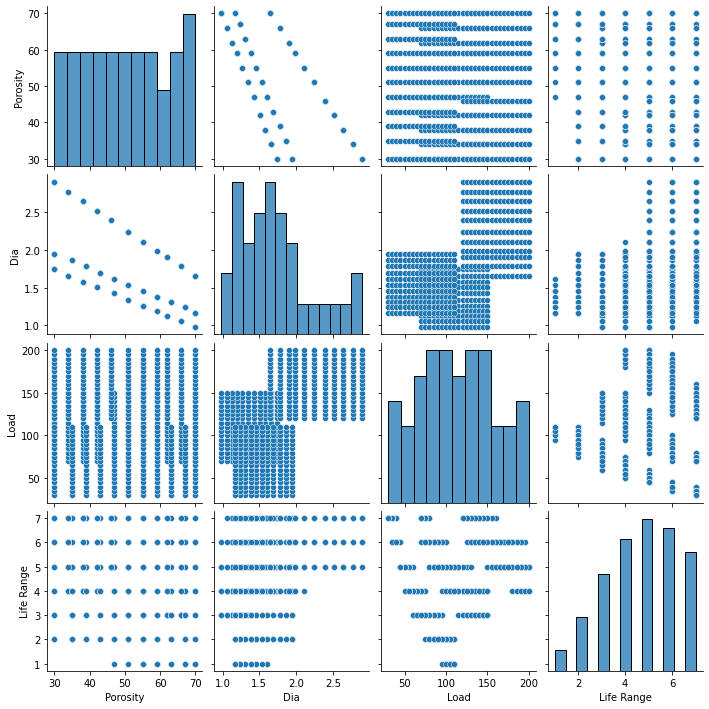

In [14]:
plt.figure(figsize=(20 , 20 ))
sns.pairplot(data)

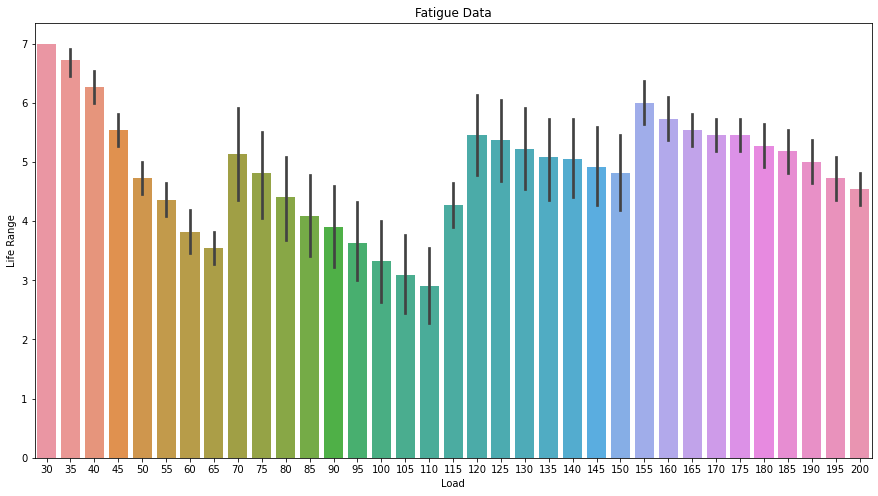

In [15]:
plt.figure(figsize=(15,8))
ax = sns.barplot(x="Load", y="Life Range", data=data).set_title("Fatigue Data")

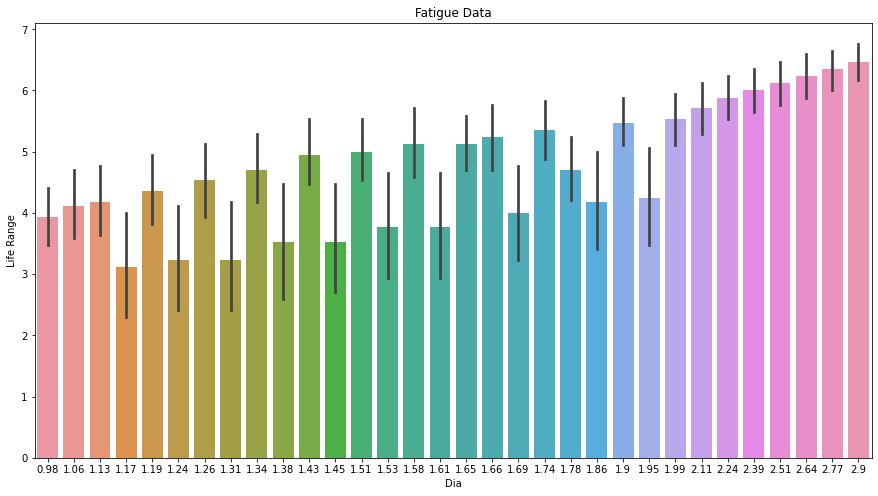

In [16]:
plt.figure(figsize=(15,8))
ax = sns.barplot(x="Dia", y="Life Range", data=data).set_title("Fatigue Data")

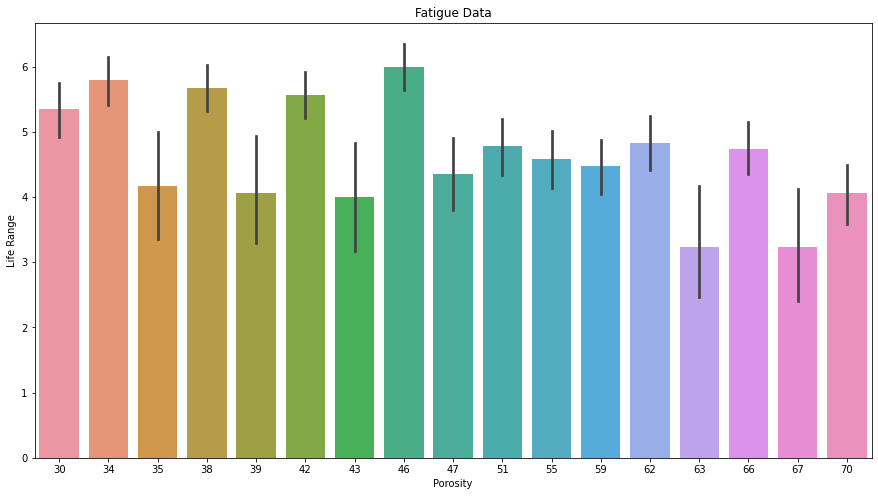

In [17]:
plt.figure(figsize=(15,8))
ax = sns.barplot(x="Porosity", y="Life Range", data=data).set_title("Fatigue Data")

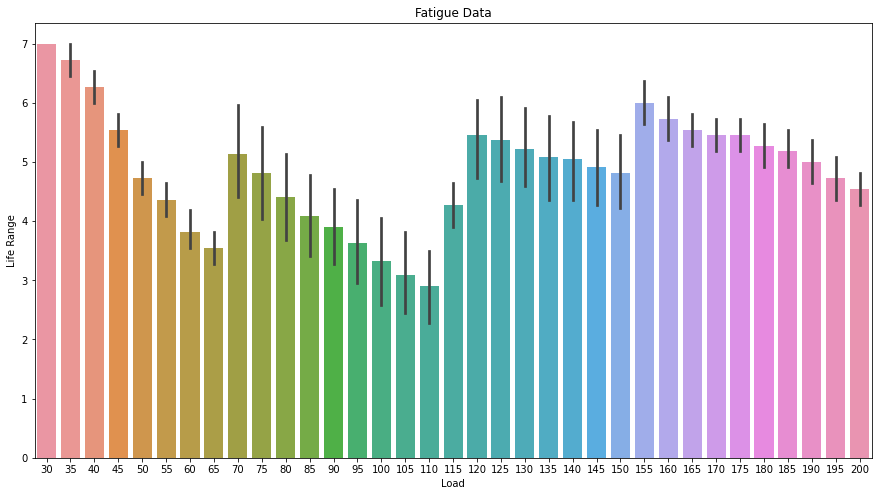

In [18]:
plt.figure(figsize=(15,8))
ax = sns.barplot(x="Load" ,y="Life Range", data=data).set_title("Fatigue Data")

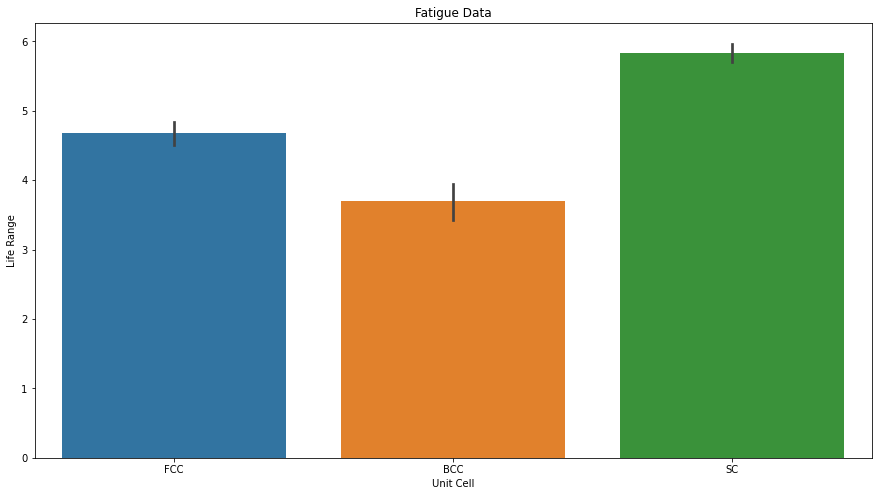

In [19]:
plt.figure(figsize=(15,8))
ax = sns.barplot(x="Unit Cell", y="Life Range", data=data).set_title("Fatigue Data")

C:\Users\HARSHA\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


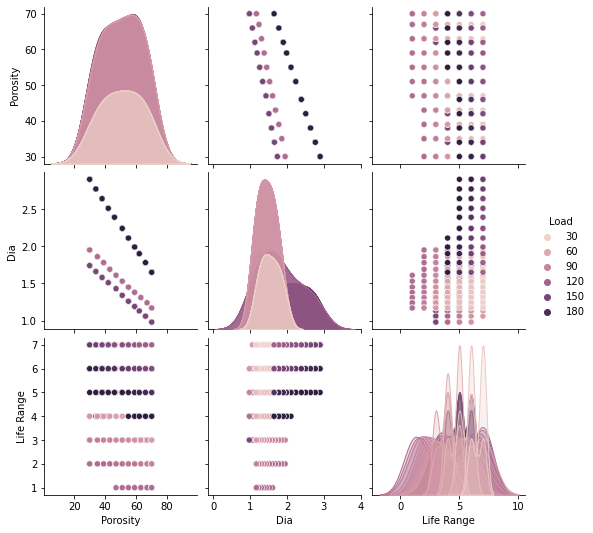

In [20]:
sns.pairplot(data, hue="Load")

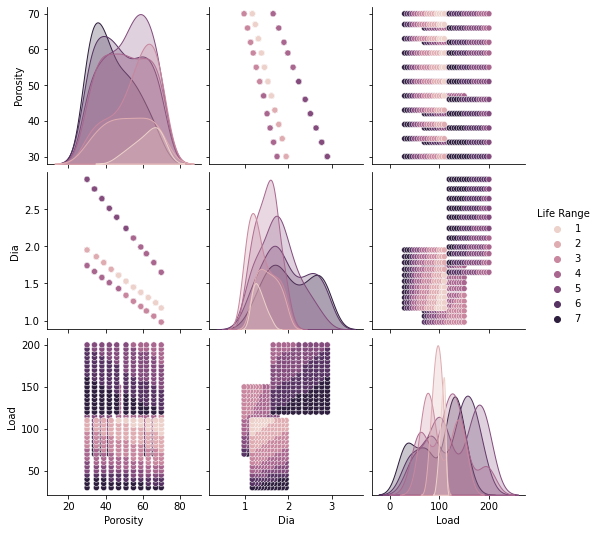

In [21]:
sns.pairplot(data, hue="Life Range")

C:\Users\HARSHA\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


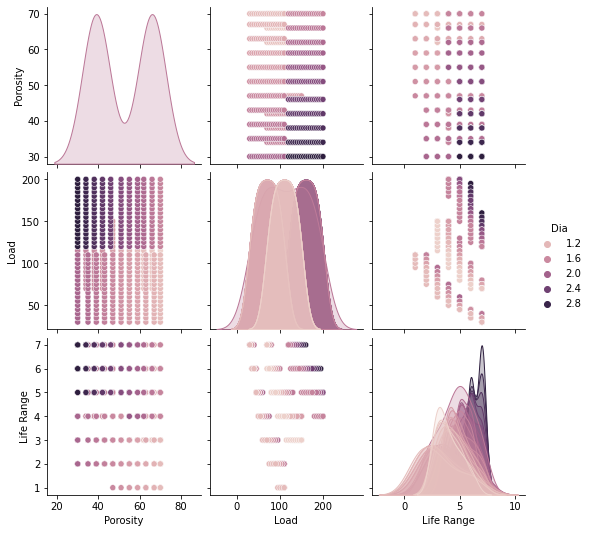

In [22]:
sns.pairplot(data, hue="Dia")

C:\Users\HARSHA\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


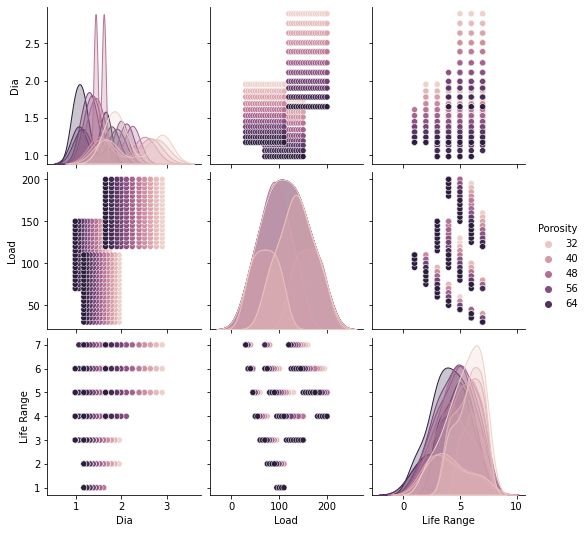

In [23]:
sns.pairplot(data, hue="Porosity")

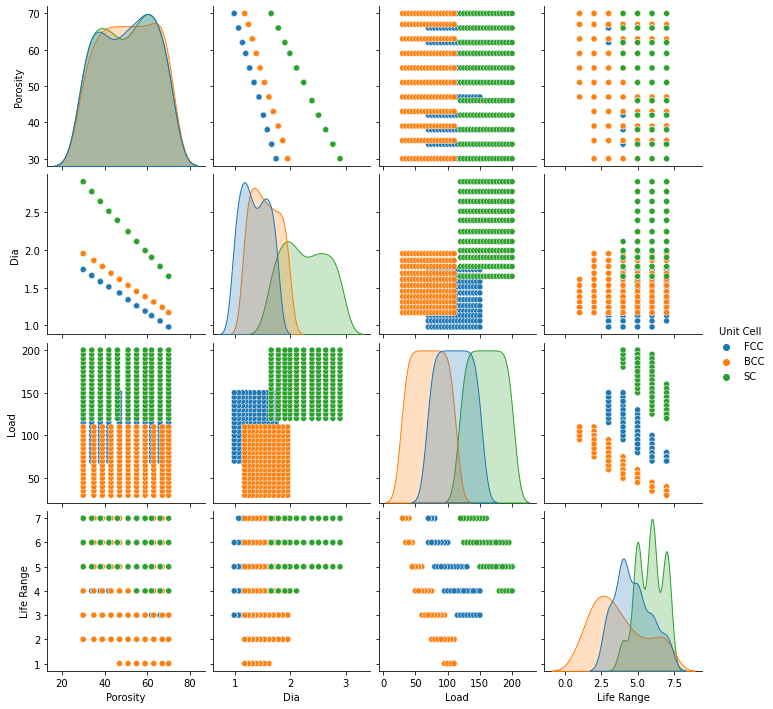

In [24]:
sns.pairplot(data, hue="Unit Cell")